In [64]:
## SEPERATION DISTANCE ESTIMATION
## BASED ON FFT OF ELECTROACOUSTIC SIGNAL
## Author Dogan Gidon, 2018/07/12

#import tools
import numpy as np
import matplotlib.pyplot as pl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
#from scipy import io as sio
import pandas as pd
import matplotlib.pyplot as plt


################################################################################
# LOAD TRAINING AND TEST DATA
df_train=pd.read_csv('sounnd_train2.csv') ##import training data
df_test=pd.read_csv('sounnd_test2.csv')

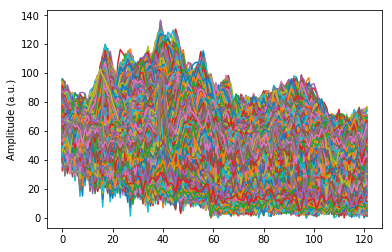

In [65]:
## visualizethe data.. OPTIONAL

l=np.arange(0,len(df_train))
l2=np.arange(0,len(df_test))
plt.figure()
#plt.plot(df_train.iloc[:,6:-1])
#plt.plot(l2,df_test.iloc[:,0:51])
plt.ylabel('Amplitude (a.u.)')
plt.plot(np.array(df_test.iloc[:,6:-1]).transpose())
plt.show()

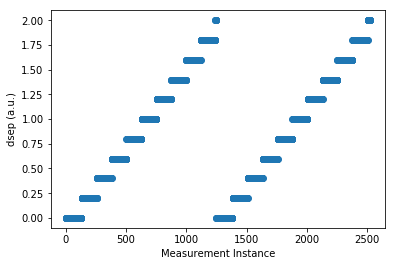

In [66]:
#select and normalize training and test input data
#the seleted columns correspond to the recroded FFT of the electroacoustic emission 
Xtest=np.array(df_test.iloc[:,3:-1])/140.
Xtrain=np.array(df_train.iloc[:,3:-1])/140.


#select and normalize test and train output data that is the known seperation distance
Ytest=np.array(np.round(df_test.iloc[:,0])/5.)
Ytrain=np.array(np.round(df_train.iloc[:,0])/5.)


## X1test
Xtest1=np.array([df_test.iloc[80,0:51]])/600.
Ytest1=np.array(df_test.iloc[80,53]/550.)


## visualize the normalized seperation distance in training data
df_test.shape
plt.figure()
plt.plot(Ytrain,'o')
plt.ylabel('dsep (a.u.)')
plt.xlabel('Measurement Instance')
plt.show()

In [67]:
#collect the and do a traing-test split to account for day-to-day variations
from sklearn.model_selection import train_test_split


Xt=np.vstack((Xtest,Xtrain))
Yt=np.hstack((np.array(Ytest).T,np.array(Ytrain).T))

Xtrain, Xtest, Ytrain, Ytest = train_test_split(Xt, Yt, test_size=0.2, random_state=0)

Model score: 0.99
1.41**2 ** 2 * RBF(length_scale=1.5)
Model score: 0.99
1.41**2 ** 2 * RBF(length_scale=1.5)
Model score: 0.99
1.41**2 ** 2 * RBF(length_scale=1.5)
Model score: 0.99
1.41**2 ** 2 * RBF(length_scale=1.5)
Model score: 0.99
1.41**2 ** 2 * RBF(length_scale=1.5)
Model score: 0.99
1.41**2 ** 2 * RBF(length_scale=1.5)
Model score: 0.99
1.41**2 ** 2 * RBF(length_scale=1.5)
Model score: 0.99
1.41**2 ** 2 * RBF(length_scale=1.5)
Model score: 0.99
1.41**2 ** 2 * RBF(length_scale=1.5)
Model score: 0.99
1.41**2 ** 2 * RBF(length_scale=1.5)
Model score: 0.99
1.41**2 ** 2 * RBF(length_scale=1.5)
Model score: 0.98
1.41**2 ** 2 * RBF(length_scale=1.5)


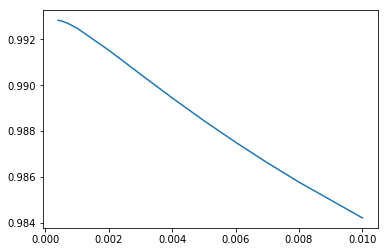

In [9]:
#Finding the hyperparameters of the GP kernel
#only choice of alpha is shown here the other parameters can be iterated over
#in the same manner
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


CC=[0.4,0.8,1.2,1.6,2.0,2.4,2.8]
SS=[0.4,0.8,1.2,1.6,2.0,2.4,2.8]
AA=[0.4e-3,0.5e-3,0.7e-3,1e-3,2e-3,3e-3,4e-3,5e-3,6e-3,7e-3,8e-3,10e-3]
scores=[]
for k in AA:
    #kernel=C(2.0, constant_value_bounds='fixed')** 2*RBF(1.5,  length_scale_bounds='fixed')
    kernel=C(2.)** 2*RBF(1.5,  length_scale_bounds='fixed')
    gp=GaussianProcessRegressor(kernel=kernel,alpha=k)
    
    gp.fit(Xtrain,Ytrain)
    
    scores+=[gp.score(Xtest,Ytest)]
    print('Model score: {:.2f}'.format(gp.score(Xtest,Ytest)))
    print(gp.kernel)
    
plt.figure()
plt.plot(AA,scores)
plt.ylabel('alpha')
plt.xlabel('R2 Score')
plt.show()

In [73]:
kernel=C(2.)** 2*RBF(1.5,  length_scale_bounds='fixed')
gp=GaussianProcessRegressor(kernel=kernel,alpha=0.4e-3)
gp.fit(Xtrain,Ytrain) #training
Yp,std=gp.predict(Xtest,return_std=True) #test


GaussianProcessRegressor(alpha=0.0004, copy_X_train=True,
             kernel=1.41**2 ** 2 * RBF(length_scale=1.5),
             n_restarts_optimizer=0, normalize_y=False,
             optimizer='fmin_l_bfgs_b', random_state=None)

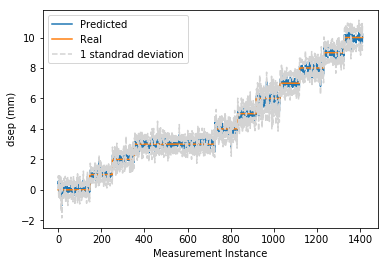

In [84]:
inds = Ytest.argsort() #sort the data for easier interpretation

plt.figure() #plot testing results
plt.plot(Yp[inds]*5,label='Predicted')
plt.plot(Ytest[inds]*5,label='Real')
plt.plot(Yp[inds]*5+2*std[inds]*5,'--',color='lightgray',label='1 standrad deviation')
plt.plot(Yp[inds]*5-2*std[inds]*5,'--',color='lightgray')
plt.ylabel('dsep (mm)')
plt.xlabel('Measurement Instance')
plt.legend()
plt.show()